# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
import pickle

import tensorflow as tf
from tensorflow.contrib.layers import flatten
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
# from skimage.transform import rotate
# from skimage.transform import warp
# from skimage.transform import ProjectiveTransform
from skimage import transform

import cv2
import random

import numpy as np
from sklearn.utils import shuffle
import glob
from skimage.transform import rescale, resize, downscale_local_mean

%matplotlib inline


---
## Step 0: Load The Data

In [2]:
# Load pickled data

training_file = './training_data/traffic-signs-data/train.p'
validation_file= './training_data/traffic-signs-data/valid.p'
testing_file = './training_data/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
print('...')
print('number of trianing images: {}'.format(len(X_train)))
print('number of trianing labels: {}'.format(len(y_train)))
print('...')
print('number of validation images: {}'.format(len(X_valid)))
print('number of validation labels: {}'.format(len(y_valid)))
print('...')
print('number of test images: {}'.format(len(X_test)))
print('number of test labels: {}'.format(len(y_test)))
print('...')

...
number of trianing images: 34799
number of trianing labels: 34799
...
number of validation images: 4410
number of validation labels: 4410
...
number of test images: 12630
number of test labels: 12630
...


In [4]:
n_train = len(X_train)

n_validation = len(X_valid)

n_test = len(X_test)

image_shape = X_train[0].shape

n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

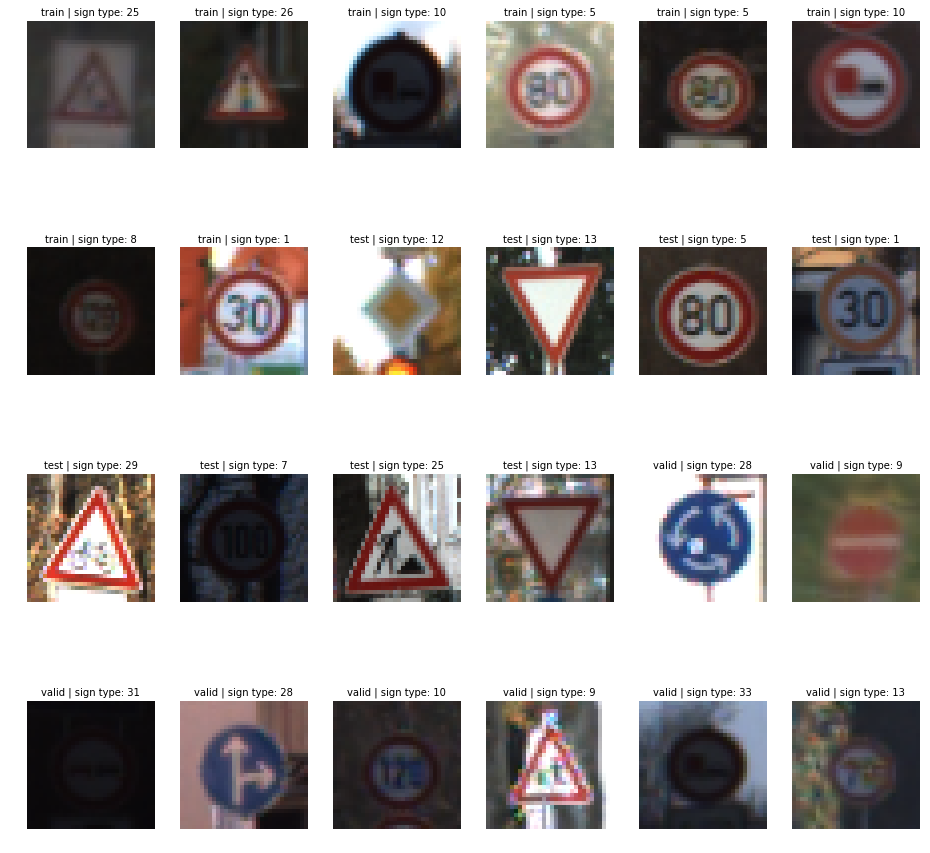

In [5]:
x = 4
y = 6

fig, axs = plt.subplots(x,y, figsize=(16, 16))
axs = axs.ravel()

# Step through the list and search for chessboard corners
for i in range(x*y):
    if i < (x*y/3):
        ind = random.randint(0, len(X_train))
        img = X_train[ind]
        axs[i].axis('off')
        axs[i].set_title('train | sign type: ' + str(y_train[ind]), fontsize=10)
        axs[i].imshow(img)
    elif i < (x*y*2/3):
        ind = random.randint(0, len(X_test))
        img = X_test[ind]
        axs[i].axis('off')
        axs[i].set_title('test | sign type: ' + str(y_test[ind]), fontsize=10)
        axs[i].imshow(img)
    else:
        ind = random.randint(0, len(X_valid))
        img = X_test[ind]
        axs[i].axis('off')
        axs[i].set_title('valid | sign type: ' + str(y_valid[ind]), fontsize=10)
        axs[i].imshow(img)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Image Exploration

I want to first take a look at the training set and see how many of each image we have to train on

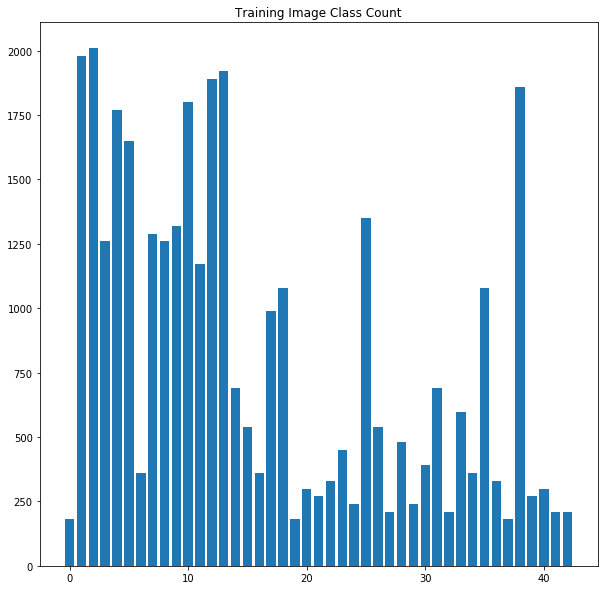

In [6]:
# Here's a handy function
# https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray-in-python

unique, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(10,10))
plt.bar(unique, counts)
plt.title('Training Image Class Count')

From this, it really seems that there aren't enough images for some of the types of signs. We should make some fake data.

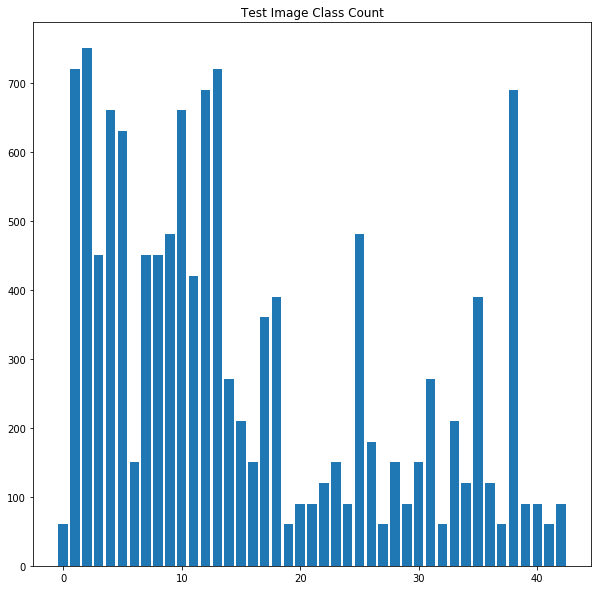

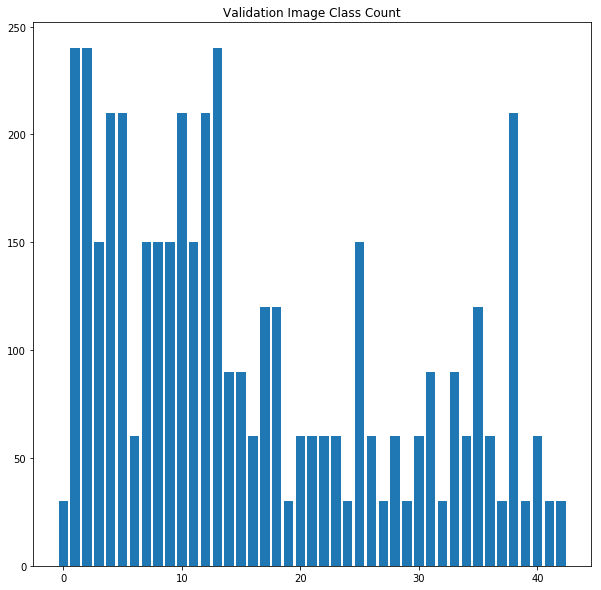

In [7]:
unique, counts = np.unique(y_test, return_counts=True)

plt.figure(figsize=(10,10))
plt.bar(unique, counts)
plt.title('Test Image Class Count')

unique, counts = np.unique(y_valid, return_counts=True)

plt.figure(figsize=(10,10))
plt.bar(unique, counts)
plt.title('Validation Image Class Count')

#### Convert to grayscale

In [8]:
### Grayscale

def convert_to_gray(data):
    return np.sum(data/3, axis=3, keepdims=True)
    

X_train_gray = convert_to_gray(X_train)
X_test_gray = convert_to_gray(X_test)
X_valid_gray = convert_to_gray(X_valid)

print("X_train shape:      {}".format(X_train.shape))
print("X_train_gray shape: {}".format(X_train_gray.shape))

X_train shape:      (34799, 32, 32, 3)
X_train_gray shape: (34799, 32, 32, 1)


In [9]:
## Normalize the data so all values range from -0.5 to +0.5
def normalize(data):
    return (data / 255) - 0.5

X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)
X_valid_norm = normalize(X_valid)

X_train_gray_norm = normalize(X_train_gray)
X_test_gray_norm = normalize(X_test_gray)
X_valid_gray_norm = normalize(X_valid_gray)

In [10]:
## Take a look at what we did, and makes sure it's right
i = random.randint(0, len(X_train))
print(X_train[i][1][1])
print(X_train_norm[i][1][1])

[114 135 164]
[-0.05294118  0.02941176  0.14313725]


(32, 32, 3)
(32, 32, 1)


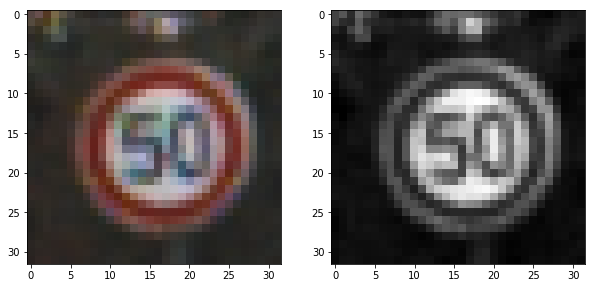

In [11]:
# Visualize the grayscale

i = random.randint(0, len(X_train))

image_color = X_train[i]
image_gray = X_train_gray[i]

print(image_color.shape)
print(image_gray.shape)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

ax1.imshow(image_color)
ax2.imshow(image_gray.squeeze(), cmap='gray')
# https://stackoverflow.com/questions/15008045/showing-an-image-with-pylab-imshow


#### Generate some fake data

In the Traffic Sign Recognition with Multi-Scale Convolutional Networks paper, they create some "fake data" by "we build a jittered dataset by adding 5 transformed versions of the original training set, yielding 126,750 samples in total. Samples are randomly perturbed in position ([-2,2] pixels), in scale ([.9,1.1] ratio) and rotation ([-15,+15] degrees)"

Most of these techniques come from here: http://docs.opencv.org/trunk/da/d6e/tutorial_py_geometric_transformations.html

#### Translation Function

In [12]:

def translate_image(img):
    
    # amount of pixels to translate
    trans_px = 2
    
    # generate random amounts to translate
    x_trans = np.random.randint(-trans_px, trans_px)
    y_trans = np.random.randint(-trans_px, trans_px)

    # define a translation matrix
    M = np.float32([[1, 0, x_trans], [0, 1, y_trans]])
    
    # Apply the translation
    trans_image = cv2.warpAffine(img, M, (img.shape[0], img.shape[1]))

    # add back in the 3rd axis...not sure why that goes away :(
    trans_image = trans_image[:, :, np.newaxis]
    
    return trans_image


(32, 32, 1)
(32, 32, 1)


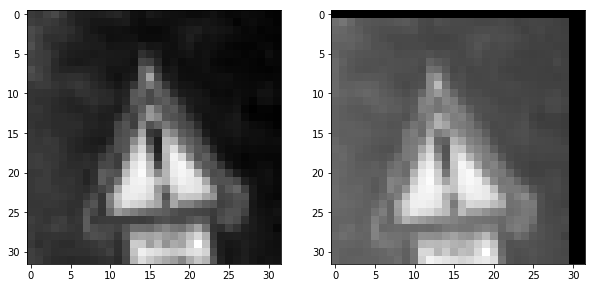

In [13]:

i = random.randint(0, len(X_train))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

image = X_train_gray[i]
print(image.shape)
ax1.imshow(image.squeeze(), cmap='gray')
# https://stackoverflow.com/questions/15008045/showing-an-image-with-pylab-imshow

trans_image = translate_image(image)
print(trans_image.shape)
ax2.imshow(trans_image.squeeze(), cmap='gray')


(32, 32, 1)
(32, 32, 1)


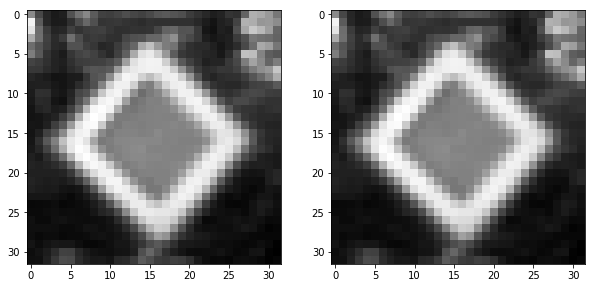

In [14]:

def scale_image(img):
    
    w, h = img.shape[:2]

    # random scale factor
    scale =  random.uniform(0.9, 1.1)

    scaled = cv2.resize(img, (32, 32), scale, scale)
    
    scaled = scaled[:, :, np.newaxis]
    
    return scaled

i = random.randint(0, len(X_train))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

image = X_train_gray[i]
print(image.shape)
ax1.imshow(image.squeeze(), cmap='gray')
# https://stackoverflow.com/questions/15008045/showing-an-image-with-pylab-imshow

scaled_image = scale_image(image)
print(scaled_image.shape)
ax2.imshow(scaled_image.squeeze(), cmap='gray')

(32, 32, 1)
(32, 32, 1)


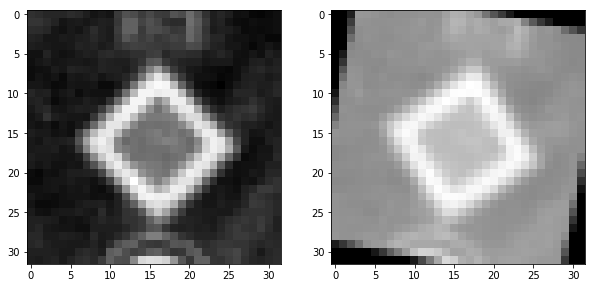

In [15]:
# with the help of:
# http://www.pyimagesearch.com/2014/01/20/basic-image-manipulations-in-python-and-opencv-resizing-scaling-rotating-and-cropping/

def rotate_image(img):
    
    (h, w) = img.shape[:2]
    center = (w / 2, h / 2)

    deg = random.randint(-15, 15)
    
    # rotate the image by 180 degrees
    M = cv2.getRotationMatrix2D(center, deg, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h))
    
    rotated = rotated[:,:,np.newaxis]
    
    return rotated

i = random.randint(0, len(X_train))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

image = X_train_gray[i]
print(image.shape)

ax1.imshow(image.squeeze(), cmap='gray')
# https://stackoverflow.com/questions/15008045/showing-an-image-with-pylab-imshow

rot_image = rotate_image(image)
print(rot_image.shape)

ax2.imshow(rot_image.squeeze(), cmap='gray')

### Add the fake data
Loop through all the classes in the data and add data to the ones without enough

In [16]:
min_samples = 750

for n_class in range(n_classes):
    
    indices = np.where(y_train == n_class)[0]
    samples = len(indices)

    if samples < min_samples:
        number_to_add = min_samples - samples
        print('adding {} to class {}'.format(number_to_add, n_class))
        
        for i in range(number_to_add):
            
            new_img = X_train_gray_norm[indices[i % samples]]
            
            choice = random.randint(0, 2)
            
            if choice == 0:
                fake_img = rotate_image(new_img)
            elif choice == 1:
                fake_img = scale_image(new_img)
            elif choice == 2:
                fake_img = translate_image(new_img)
            
            X_train_gray_norm = np.concatenate((X_train_gray_norm, [fake_img]), axis=0)
            y_train = np.concatenate((y_train, [n_class]), axis=0)
            

adding 570 to class 0
adding 390 to class 6
adding 60 to class 14
adding 210 to class 15
adding 390 to class 16
adding 570 to class 19
adding 450 to class 20
adding 480 to class 21
adding 420 to class 22
adding 300 to class 23
adding 510 to class 24
adding 210 to class 26
adding 540 to class 27
adding 270 to class 28
adding 510 to class 29
adding 360 to class 30
adding 60 to class 31
adding 540 to class 32
adding 151 to class 33
adding 390 to class 34
adding 420 to class 36
adding 570 to class 37
adding 480 to class 39
adding 450 to class 40
adding 540 to class 41
adding 540 to class 42


In [17]:
print(len(X_train_gray_norm))
print(len(y_train))

45180
45180


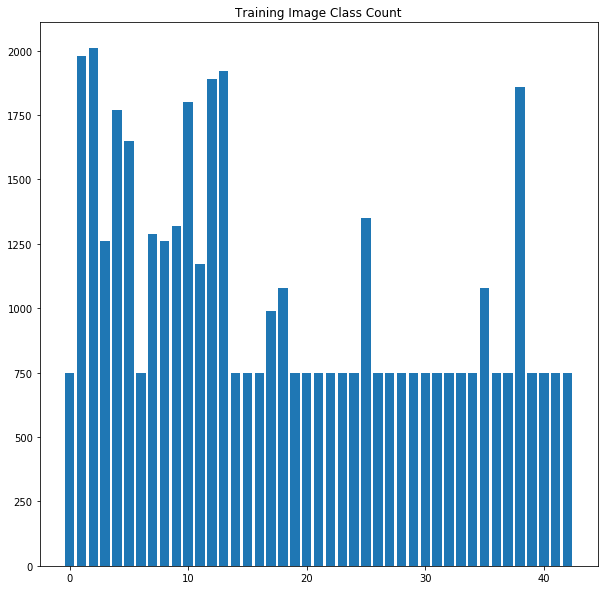

In [18]:
unique, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(10,10))
plt.bar(unique, counts)
plt.title('Training Image Class Count')

### Save the datasets

Since we spent a lot of time making them...

In [19]:
pkl = {
    'X_train_gray_norm': X_train_gray_norm,
    'y_train': y_train
}
pickle.dump( pkl, open( "./training_data/train_gray_norm_augmented.p", "wb" ) )

### Shuffle and split

Because we've added a lot more data to the training set, let's add some more data to the validation set as well

In [21]:
from sklearn.model_selection import train_test_split

X_train_final, X_valid_final, y_train_final, y_valid_final = train_test_split(X_train_gray_norm, y_train, 
                                                                test_size=0.15, random_state=32)

# concatenate the existing validation data
X_valid_final = np.concatenate((X_valid_final, X_valid_gray_norm))
y_valid_final = np.concatenate((y_valid_final, y_valid))

### Model Architecture

In [22]:
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3 (Color image, so depth is 3). Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.tanh(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.tanh(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.tanh(fc1)
    
    # Dropout
    do = tf.nn.dropout(fc1, dropout_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(do, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.tanh(fc2)
    
    # Dropout
    do = tf.nn.dropout(fc2, dropout_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(do, fc3_W) + fc3_b
    
    return logits

### Variables
x is a placeholder for a batch of input images.
y is a placeholder for a batch of output labels.

In [23]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
dropout_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [24]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [25]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, dropout_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [26]:
EPOCHS = 25
BATCH_SIZE = 128

In [27]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_final)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_shuffle, y_train_shuffle = shuffle(X_train_final, y_train_final)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_shuffle[offset:end], y_train_shuffle[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout_prob: 0.5})

        validation_accuracy = evaluate(X_valid_gray_norm, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.736

EPOCH 2 ...
Validation Accuracy = 0.848

EPOCH 3 ...
Validation Accuracy = 0.899

EPOCH 4 ...
Validation Accuracy = 0.924

EPOCH 5 ...
Validation Accuracy = 0.924

EPOCH 6 ...
Validation Accuracy = 0.941

EPOCH 7 ...
Validation Accuracy = 0.942

EPOCH 8 ...
Validation Accuracy = 0.948

EPOCH 9 ...
Validation Accuracy = 0.954

EPOCH 10 ...
Validation Accuracy = 0.954

EPOCH 11 ...
Validation Accuracy = 0.961

EPOCH 12 ...
Validation Accuracy = 0.951

EPOCH 13 ...
Validation Accuracy = 0.961

EPOCH 14 ...
Validation Accuracy = 0.959

EPOCH 15 ...
Validation Accuracy = 0.952

EPOCH 16 ...
Validation Accuracy = 0.962

EPOCH 17 ...
Validation Accuracy = 0.960

EPOCH 18 ...
Validation Accuracy = 0.958

EPOCH 19 ...
Validation Accuracy = 0.963

EPOCH 20 ...
Validation Accuracy = 0.963

EPOCH 21 ...
Validation Accuracy = 0.965

EPOCH 22 ...
Validation Accuracy = 0.960

EPOCH 23 ...
Validation Accuracy = 0.964

EPOCH 24 ...
Validation Accura

### Training History

1. LeNet archeticture, standard setup. EPOCH = 10
    - Validation Accuracy = 0.898
    
2. EPOCH = 25
    - Validation Accuracy = 0.906
    - Accuracy basically the same from EPOCH 7+

3. Read the paper, and replace relu with tanh activations, EPOCH = 10
    - Validation Accuracy = 0.943
    
4. Convert images to grayscale, EPOCH = 10
    - Validation Accuracy = 0.937
    
5. Back to relu's, EPOCH = 10
    - Validation Accuracy = 0.891
    
6. Tanh activations, add dropout layers, EPOCH = 25
    - Validation Accuracy = 0.964
    
7. Add fake data, EPOCH = 25
    - Validation Accuracy = 0.956
    
8. Split the validation off the new training data
    - Validation Accuracy = 0.965
    

In [28]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")
    test_accuracy = evaluate(X_test_gray_norm, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

Test Set Accuracy = 0.942


## 94.2% Accuracy on the test set

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:


images = glob.glob('./new_images/*.jpg')

print(images)

new_images = []

for fname in images:

    img = cv2.imread(fname)
    
    image_resized = resize(img, (32, 32), mode='reflect')
    print(image_resized.shape)
    
    new_images.append(image_resized)
    
    plt.figure()
    plt.imshow(image_resized)
    
new_images = np.asanyarray(image_resized)


# convert to gray
gray_imgs = convert_to_gray(new_images)


In [ ]:
my_images = []
fig, axs = plt.subplots(2,4, figsize=(4, 2))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i, img in enumerate(glob.glob('./new_images/*.png')):
    image = cv2.imread(img)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    my_images.append(image)

my_images = np.asarray(my_images)

print(my_images.shape)

my_images_gry = np.sum(my_images/3, axis=3, keepdims=True)

my_images_normalized = (my_images_gry - 128)/128 

print(my_images_normalized.shape)

### Predict the Sign Type for Each Image

In [ ]:
print((new_images[4]))
new_images_norm =  (new_images / 255) - 0.5
print(new_images_norm[1])

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.


new_images_norm =  (new_images / 255) - 0.5
new_images_norm = np.reshape(new_images_norm, (128,))
new_labels = [18, 14, 25, 1, 17]

print(new_images_norm[0])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_accuracy = evaluate(new_images_norm, new_labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

In [ ]:
new_images[1]

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")